# PROJET ENERGIE - PRE-PROCESSING AU NIVEAU REGIONAL
**Objectifs** : Suite aux constats établis lors des étapes précédentes, vous devrez nettoyer votre jeu de données, et si besoin le transformer et l’enrichir.
L’objectif à la fin de cette étape est d’avoir un dataset prêt pour effectuer des analyses approfondies et/ou une modélisation à l’aide de Machine Learning.

**Affichage du fichier de données :**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/ProjetEnergie/eco2mix-regional-cons-def.csv', sep=';')

df.head()

Mounted at /content/gdrive


,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 30
0,27,Bourgogne-Franche-Comté,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28,Normandie,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,53,Bretagne,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,32,Hauts-de-France,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,75,Nouvelle-Aquitaine,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Suppression de la dernière colonne qui est vide :**

In [ ]:
df = df.drop(columns = 'Column 30')

**Suppression des 12 premières colonnes qui ne possèdent que des NaN :**

In [ ]:
import numpy as np
variables_numeriques = df.select_dtypes(include=['float']).columns
df = df.dropna(axis=0, how='all', subset=variables_numeriques)

**Suppression des valeurs manquantes pour les colonnes 'Nucléaire (MW)' et 'Eolien (MW)' :**

In [ ]:
df['Nucléaire (MW)'] = df['Nucléaire (MW)'].fillna(0)
df['Eolien (MW)'] = df['Eolien (MW)'].fillna(0)

**Convertion de la colonne Date en datetime :**

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], yearfirst=True)

**Création d'une colonne production :**

In [ ]:
df['Production (MW)'] = df['Thermique (MW)'] + df['Nucléaire (MW)'] + df['Eolien (MW)'] + df['Solaire (MW)'] + df['Hydraulique (MW)'] + df['Bioénergies (MW)']

**Simplification du fichier :**

In [ ]:
df = df.drop(columns=['Nature', 'Date - Heure', 'Stockage batterie',
       'Déstockage batterie', 'Eolien terrestre', 'Eolien offshore',
       'TCO Thermique (%)', 'TCH Thermique (%)', 'TCO Nucléaire (%)',
       'TCH Nucléaire (%)', 'TCO Eolien (%)', 'TCH Eolien (%)',
       'TCO Solaire (%)', 'TCH Solaire (%)', 'TCO Hydraulique (%)',
       'TCH Hydraulique (%)', 'TCO Bioénergies (%)', 'TCH Bioénergies (%)'])

In [ ]:
df.head()

,Code INSEE région,Région,Date,Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),Production (MW)
12,52,Pays de la Loire,2013-01-01,00:30,3595.0,127.0,0.0,182.0,0.0,0.0,NaN,32.0,3252.0,341.0
13,24,Centre-Val de Loire,2013-01-01,00:30,2476.0,90.0,9085.0,508.0,0.0,34.0,NaN,25.0,-7267.0,9742.0
14,44,Grand Est,2013-01-01,00:30,4943.0,319.0,9137.0,1109.0,0.0,1418.0,0.0,57.0,-7102.0,12040.0
15,11,Île-de-France,2013-01-01,00:30,9134.0,685.0,0.0,16.0,0.0,0.0,NaN,142.0,8289.0,843.0
16,27,Bourgogne-Franche-Comté,2013-01-01,00:30,2357.0,236.0,0.0,106.0,0.0,105.0,0.0,12.0,1894.0,459.0


**Création d'une colonne énergies renouvelables :**

In [ ]:
df['Energies renouvelables (MW)'] = df['Hydraulique (MW)'] + df['Eolien (MW)'] + df['Solaire (MW)'] + df['Bioénergies (MW)']

**Création d'un GroupBy par jour :**

In [ ]:
df = df.groupby(['Code INSEE région', 'Région', 'Date']).agg({'Consommation (MW)' : 'sum', 'Thermique (MW)' : 'sum', 'Nucléaire (MW)' : 'sum',
                                                 'Eolien (MW)' : 'sum', 'Solaire (MW)' : 'sum', 'Hydraulique (MW)' : 'sum',
                                                 'Bioénergies (MW)' : 'sum', 'Production (MW)' : 'sum', 'Pompage (MW)' : 'sum',
                                                 'Ech. physiques (MW)' : 'sum', 'Energies renouvelables (MW)' : 'sum'})

**Création d'une clé par ligne (ID) :**

In [ ]:
df = df.reset_index()
df['Année'] = df['Date'].astype(str).str[0:4]
df['Mois'] = df['Date'].astype(str).str[5:-3]
df['Jour'] = df['Date'].astype(str).str[-2:]
#df['ID'] = df['Code INSEE région'].astype(str) + '-' + df['Année'] + '-' + df['Mois'] + '-' + df['Jour']
df['ID'] = df['Code INSEE région'].astype(str) + '-' + df['Date'].astype(str)

**On supprime les années avant 2016 :**

In [ ]:
df = df.loc[(df['Année'] == '2016') | (df['Année'] == '2017') | (df['Année'] == '2018') | (df['Année'] == '2019') | (df['Année'] == '2020') | (df['Année'] == '2021') | (df['Année'] == '2022')]

**On importe le fichier des températures :**

In [ ]:
dft = pd.read_csv('gdrive/My Drive/Colab Notebooks/ProjetEnergie/temperature-quotidienne-regionale.csv', sep=';')

dft.head()

,ID,Date,Code INSEE région,Région,TMin (°C),TMax (°C),TMoy (°C)
0,2020-08-13T00:00:00-52,2020-08-13,52,Pays de la Loire,19.25,25.35,22.30
1,2020-08-13T00:00:00-76,2020-08-13,76,Occitanie,17.51,26.55,22.03
2,2020-08-14T00:00:00-52,2020-08-14,52,Pays de la Loire,17.70,25.70,21.70
3,2020-08-14T00:00:00-32,2020-08-14,32,Hauts-de-France,18.92,23.40,21.16
4,2020-08-14T00:00:00-28,2020-08-14,28,Normandie,17.64,22.90,20.27


**Création d'une clé par ligne (ID) :**

In [ ]:
dft['Date'] = pd.to_datetime(dft['Date'], yearfirst=True)
dft['ID'] = dft['Code INSEE région'].astype(str) + '-' + dft['Date'].astype(str)

**Vérification des variables de région :**

In [ ]:
print(df['Code INSEE région'].unique())
print(dft['Code INSEE région'].unique())
print("Notre fichier d'origine ne contient pas la région 94 qui correspond à la Corse. Nous ne pourrons donc pas traiter cette région.")

[11 24 27 28 32 44 52 53 75 76 84 93]
[52 76 32 28 24 53 75 84 11 94 44 93 27]
Notre fichier d'origine ne contient pas la région 94 qui correspond à la Corse. Nous ne pourrons donc pas traiter cette région.


**Merge des deux fichiers :**

In [ ]:
dft = dft.drop(columns = ['Date', 'Code INSEE région', 'Région'])
df_union = pd.merge(df, dft, on=['ID'])
df_union.head()

,Code INSEE région,Région,Date,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Bioénergies (MW),...,Pompage (MW),Ech. physiques (MW),Energies renouvelables (MW),Année,Mois,Jour,ID,TMin (°C),TMax (°C),TMoy (°C)
0,11,Île-de-France,2016-01-01,399184.0,14773.0,0.0,383.0,55.0,471.0,7091.0,...,0.0,376427.0,8000.0,2016,01,01,11-2016-01-01,3.30,8.76,6.03
1,11,Île-de-France,2016-01-02,404152.0,14500.0,0.0,997.0,90.0,454.0,6736.0,...,0.0,381378.0,8277.0,2016,01,02,11-2016-01-02,6.60,10.86,8.73
2,11,Île-de-France,2016-01-03,420933.0,14510.0,0.0,965.0,29.0,468.0,6915.0,...,0.0,398043.0,8377.0,2016,01,03,11-2016-01-03,5.30,8.08,6.69
3,11,Île-de-France,2016-01-04,479017.0,19696.0,0.0,895.0,170.0,508.0,6559.0,...,0.0,451184.0,8132.0,2016,01,04,11-2016-01-04,5.46,9.76,7.61
4,11,Île-de-France,2016-01-05,499664.0,19413.0,0.0,1047.0,64.0,552.0,7097.0,...,0.0,471485.0,8760.0,2016,01,05,11-2016-01-05,5.12,9.00,7.06


**Comparaison Consommation / Température avec région :**

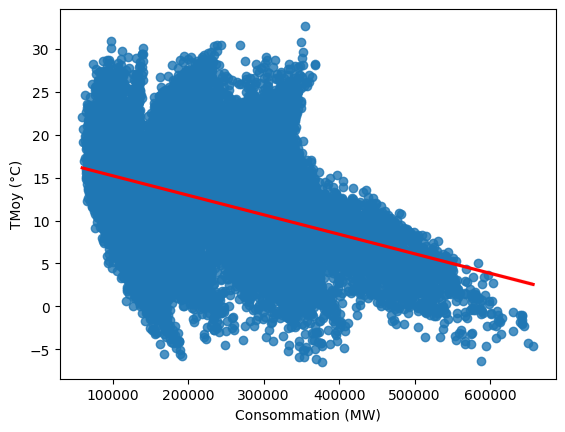

In [ ]:
import seaborn as sns
sns.regplot(x='Consommation (MW)', y='TMoy (°C)', data=df_union, line_kws={"color": "red"});

**Comparaison Consommation / Température au niveau national :**

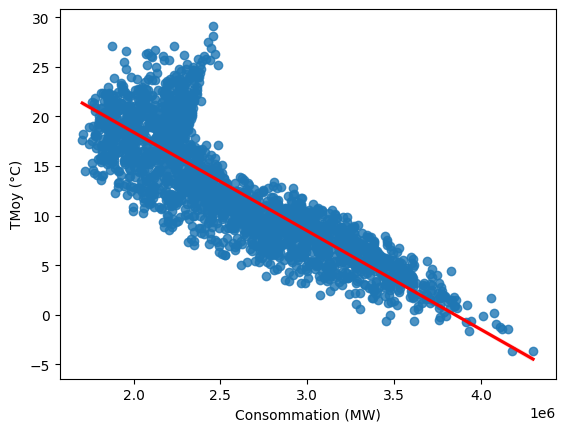

In [ ]:
df_gb_date = df_union.groupby('Date').agg({'TMoy (°C)' : 'mean', 'Consommation (MW)' : 'sum'})
sns.regplot(x='Consommation (MW)', y='TMoy (°C)', data=df_gb_date, line_kws={"color": "red"});

**Derniers nettoyages (suppression de colonnes) :**

In [ ]:
df_union = df_union.drop(columns=['Région','Date','Pompage (MW)','Ech. physiques (MW)','ID'])
df_union['Année'] = pd.to_numeric(df_union['Année'])
df_union['Mois'] = pd.to_numeric(df_union['Mois'])
df_union['Jour'] = pd.to_numeric(df_union['Jour'])
df_union.head()

,Code INSEE région,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Bioénergies (MW),Production (MW),Energies renouvelables (MW),Année,Mois,Jour,TMin (°C),TMax (°C),TMoy (°C)
0,11,399184.0,14773.0,0.0,383.0,55.0,471.0,7091.0,22773.0,8000.0,2016,1,1,3.30,8.76,6.03
1,11,404152.0,14500.0,0.0,997.0,90.0,454.0,6736.0,22777.0,8277.0,2016,1,2,6.60,10.86,8.73
2,11,420933.0,14510.0,0.0,965.0,29.0,468.0,6915.0,22887.0,8377.0,2016,1,3,5.30,8.08,6.69
3,11,479017.0,19696.0,0.0,895.0,170.0,508.0,6559.0,27828.0,8132.0,2016,1,4,5.46,9.76,7.61
4,11,499664.0,19413.0,0.0,1047.0,64.0,552.0,7097.0,28173.0,8760.0,2016,1,5,5.12,9.00,7.06


In [ ]:
df_union.isna().sum()

Code INSEE région              0
Consommation (MW)              0
Thermique (MW)                 0
Nucléaire (MW)                 0
Eolien (MW)                    0
Solaire (MW)                   0
Hydraulique (MW)               0
Bioénergies (MW)               0
Production (MW)                0
Energies renouvelables (MW)    0
Année                          0
Mois                           0
Jour                           0
TMin (°C)                      0
TMax (°C)                      0
TMoy (°C)                      0
dtype: int64

In [ ]:
df_union.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28104 entries, 0 to 28103
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Code INSEE région            28104 non-null  int64  
 1   Consommation (MW)            28104 non-null  float64
 2   Thermique (MW)               28104 non-null  float64
 3   Nucléaire (MW)               28104 non-null  float64
 4   Eolien (MW)                  28104 non-null  float64
 5   Solaire (MW)                 28104 non-null  float64
 6   Hydraulique (MW)             28104 non-null  float64
 7   Bioénergies (MW)             28104 non-null  float64
 8   Production (MW)              28104 non-null  float64
 9   Energies renouvelables (MW)  28104 non-null  float64
 10  Année                        28104 non-null  int64  
 11  Mois                         28104 non-null  int64  
 12  Jour                         28104 non-null  int64  
 13  TMin (°C)       

In [ ]:
df_union.to_csv('gdrive/My Drive/Colab Notebooks/Energie/df_nettoye.csv')